# Making Inferences Based on U.S. Sales of Popular Video Games

Hannah Kong

## 1. Introduction

In [3]:
#Imports here
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("video_games.csv", encoding = 'unicode_escape')

#### A.) Dataset Introduction

The dataset that is going to be used in this analysis is the video games dataset provided by the Professor. The video games dataset has many quantitative and categorial variables for each unit of observation(one video game released between 2004-2010 sold in the U.S.). Some important variables include the console, title, US Sales, Year Released, and Used Price. The purpose of the data collected was to determine which aspects of a video game influenced how much money it made in US Sales and therefore the relationship between certain variables and the likelihood of a video game becoming a block-buster game.  

#### B.) Populations and Samples

The Video Games Dataset represents a sample of video games. I know this because the units of observations in this dataset are only video games that are sold in the States that were released in years 2004-2010. Therefore the corresponding population of interest should be video games sold anywhere in the world, no matter their release date. 

#### C.) Motivation

Individuals who are looking to create their own video game or looking to invest in an up and coming game would be interested in exploring this dataset. This dataset aims to determine what makes a video game succesful by recording data on different variables that might present a correlation between why one video game does better than another in terms of sales. Someone could look at this dataset and compare their own values to each variable to the values of other video games that have gone big. They might configure their game closer to the different aspects that made one specific game more popular and succesful than all the others.

#### D.) Research Questions

1. How is the used price of a video game collected because it might sell for different prices at different stores? What's a reasonable price range for a video game in the population of all video games released?
   
3. Is there a relationship between what console a video game is offered on and their US sales in millions? Is there an association between these two variables in my population?

I am interested in answering these research questions because the price at which a game is selling at as well as the console(s) play a large role in whether or not a video game could go big. The answers to these research questions can be used by individuals who are looking to create their own video game or those who are trying to determine whether or not they would like to invest a certain video game. They could see if that game is priced reasonably and also what publisher is publishing it. 

## 2. Confidence Interval Analytical Tasks

#### A.) Research Questions

1. How is the used price of a video game collected because it might sell for different prices at different stores? What's a reasonable price range for a video game in the population of all video games released?

#### B.) Dataset Cleaning

In [6]:
df['Usedprice'].unique()

array([ 24.95,  14.95,  22.95,  12.95,  19.95,  17.95,   8.95,   9.95,
         7.95,  16.95,  29.95,  26.95,  15.95,   4.95,  13.95,  11.95,
         6.95,   5.95,  27.95,  39.95,  10.95,  32.95,  49.95,  23.95,
        34.95,  44.95, 119.95,  47.95,  37.95])

My variable of interest, the used price of a video game, has no missing values.

#### C.) Descriptive Analysis

In [7]:
df['Usedprice'].mean()

19.510451977401125

The mean used price of a video game in the United States that was released in 2004-2010 is 19.51 dollars.

<Axes: xlabel='Usedprice'>

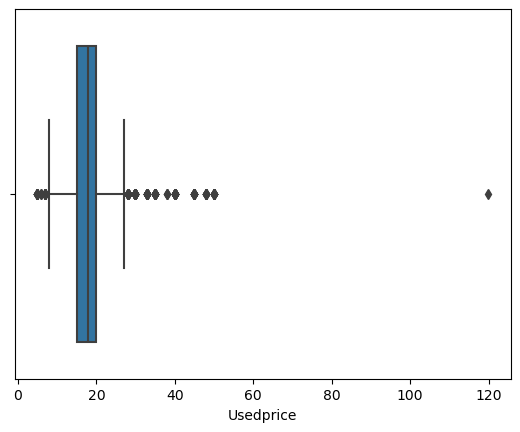

In [10]:
sns.boxplot(x = 'Usedprice', data = df)

In this boxplot, I am visualizing the used prices of the video games in this sample. The center of this distribution appears to be around 19 dollars and the 25th percentile seems to be around 10 dollars and the 75th percentile appears to be around 25 dollars. There are many outliers, both upper and lower outliers, with one extreme value which is a video game selling for 120 dollars. The distribution may also be skewed right due to all the upper outliers. 

Median would be the appropriate measure to describe a feature of my variable of interest because as you can see in the box plot, there are a few outliers. The mean is sensitive to outliers therefore I would use the median instead. 

#### D.) Create a Confidence Interval (95%)

In [7]:
data = []
for i in range(500):
    sample = df['Usedprice'].sample(10).median()
    data.append(sample)
df_sampling_dist = pd.DataFrame({'x':data})
df_sampling_dist

,x
0,17.95
1,19.95
2,16.45
3,19.95
4,17.95
...,...
495,17.45
496,17.45
497,16.95
498,17.95


In [9]:
(df_sampling_dist['x']).quantile(0.025)

14.95

In [10]:
(df_sampling_dist['x']).quantile(0.975)

21.974999999999977

#### E.) Interpret the Confidence Interval and Level

Confidence Interval: I am 95% confident that the population median used price for a video game that was released within 2004-2010 and is sold in the United States lies within this confidence interval range of 14.95 dollars to 21.97 dollars.

Confidence Level: If I were to repeat this procedure many times, calculating a confidence interval for each random sample, I would expect 95% of the confidence interals to contain the true population median of the used price of a video game released within 2004-2010 and sold in the United States.

## 3. Hypothesis Testing Analytical Tasks

#### A.) Research Questions

Is there a relationship between what console a video game is offered on and their US sales in millions? Is there an association between these two variables in my population?

#### B.) Dataset Cleaning

In [69]:
df_consoles = df[(df['Console'] == 'Nintendo DS') | (df['Console'] == 'Nintendo Wii')]
df_consoles = df_consoles.reset_index()
df_consoles

,index,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,...,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
0,0,Nintendo DS,Super Mario 64 DS,4.69,1,1,1,1,2004,1,...,0,0,0,0,0,1,0,0,0,1
1,2,Nintendo DS,WarioWare Touched!,0.54,0,0,0,1,2004,1,...,0,0,0,0,0,1,1,1,1,1
2,4,Nintendo DS,Spider-Man 2,0.45,0,0,0,0,2004,1,...,0,0,0,0,0,1,0,1,0,1
3,5,Nintendo DS,The Urbz: Sims in the City,0.41,0,0,0,0,2004,1,...,0,0,0,0,0,0,1,0,0,0
4,8,Nintendo DS,Madden NFL 2005,0.25,0,0,0,0,2004,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,1751,Nintendo Wii,Trauma Team,0.10,0,0,0,0,2010,0,...,0,0,0,0,1,0,0,0,0,0
710,1752,Nintendo DS,Mega Man Zero Collection,0.10,0,0,0,0,2010,0,...,0,0,0,0,0,1,0,1,0,1
711,1756,Nintendo DS,Shin Megami Tensei: Strange Journey,0.08,0,0,0,0,2010,0,...,0,0,0,0,1,0,0,0,0,0
712,1759,Nintendo Wii,Data East Arcade Classics,0.06,0,0,0,0,2010,0,...,0,0,0,0,0,1,0,1,0,1


#### C.) Population Definition

I have one population of interest with two variables recorded for it. My population of interest is all video games released and sold in the world and the two variables that were recorded for this were whether or not that game can be played on the Nintendo DS and whether or not it can be played on the Nintendo Wii. 

#### D.) Descriptive Analysis

For the numerical summary, refer to part E when I used groupby to create a table of numerical summaries

<Axes: xlabel='Console', ylabel='US Sales (millions)'>

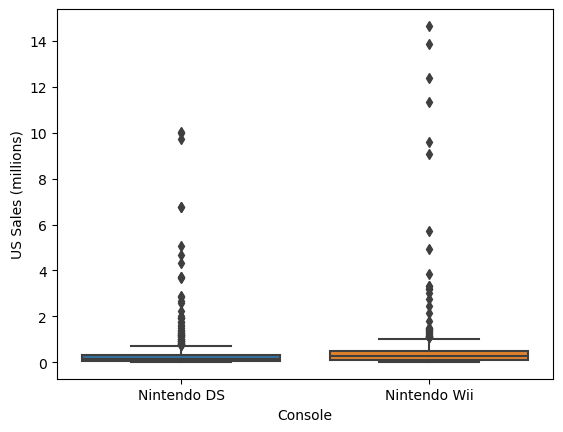

In [72]:
sns.boxplot(x = 'Console', y = 'US Sales (millions)', data = df_consoles)

Looking at this box plot, I can see that there are many outliers for both Nintendo DS and Nintendo Wii. They are mostly upper outliers. Looking at the distribution for these 2 variables, I don't see that much variation in shape for Nintendo DS and Nintendo Wii which would lead me to believe that there doesn't appear to be a relationship between whether a game is on Nintendo DS or Nintendo Wii and how much money they made in US Sales. Both medians are around 1 million and for both of the distributions, most of the data lies within 0 to 1.2 million. Lastly, the fact that there are so many outliers for both box plots tells me that I need to use the median as my parameter of interest, not my mean. 

#### E.) Perform a Hypothesis Test

The parameter of interest is Median 1 - Median 2 which is the difference in the median number of US Sales in millions for the Nintendo DS and the median number of US Sales in millions for the Nintendo Wii

Null Hypothesis (H0): Median 1 - Median 2 = 0 -> There is no difference between the median amount of US Sales in millions for the Nintendo DS and the median number of US Sales in millions for the Nintendo Wii.

Alternative Hypothesis (HA): Median 1 - Median 2 != 0 -> There is a difference between the median amount of US Sales in millions for the Nintendo DS and the median number of US Sales in millions for the Nintendo Wii.

Significance Level: 0.05

In order to match the conditions for a hypothesis test, I need to make sure that the samples are random samples and the population is normally distributed. I also need to adopt the skeptic's claim that there is no difference in median of these 2 variables so I will shuffle the labels without replacement.

In [52]:
df_shuffled = pd.DataFrame({"shuffled": df_consoles['Console'].sample(714, replace = False)})
df_shuffled = df_shuffled.reset_index()
df_shuffled

,index,shuffled
0,211,Nintendo DS
1,146,Nintendo DS
2,533,Nintendo DS
3,355,Nintendo DS
4,551,Nintendo Wii
...,...,...
709,368,Nintendo DS
710,278,Nintendo DS
711,650,Nintendo Wii
712,360,Nintendo DS


In [50]:
df_consoles['Console'].value_counts()

Console
Nintendo DS     418
Nintendo Wii    296
Name: count, dtype: int64

In [53]:
df_shuffled['shuffled'].value_counts()

shuffled
Nintendo DS     418
Nintendo Wii    296
Name: count, dtype: int64

The value counts for Nintendo DS and Nintendo Wii are the same before and after we shuffled. 

In [55]:
df_shuffled['US Sales (millions)'] = df_consoles['US Sales (millions)']
df_shuffled

,index,shuffled,US Sales,US Sales (millions)
0,211,Nintendo DS,4.69,4.69
1,146,Nintendo DS,0.54,0.54
2,533,Nintendo DS,0.45,0.45
3,355,Nintendo DS,0.41,0.41
4,551,Nintendo Wii,0.25,0.25
...,...,...,...,...
709,368,Nintendo DS,0.10,0.10
710,278,Nintendo DS,0.10,0.10
711,650,Nintendo Wii,0.08,0.08
712,360,Nintendo DS,0.06,0.06


In [58]:
df_consoles[['Console', 'US Sales (millions)']].groupby(['Console']).describe()

US Sales (millions)                                        \
                           count      mean       std   min   25%   50%   
Console                                                                  
Nintendo DS                418.0  0.447943  1.121021  0.01  0.06  0.12   
Nintendo Wii               296.0  0.691115  1.775619  0.01  0.10  0.26   

                             
                 75%    max  
Console                      
Nintendo DS   0.3275  10.03  
Nintendo Wii  0.4800  14.66

In [59]:
df_shuffled[['shuffled', 'US Sales (millions)']].groupby(['shuffled']).describe()

US Sales (millions)                                        \
                           count      mean       std   min   25%   50%   
shuffled                                                                 
Nintendo DS                418.0  0.595359  1.565759  0.01  0.07  0.17   
Nintendo Wii               296.0  0.482939  1.221088  0.01  0.07  0.16   

                             
                 75%    max  
shuffled                     
Nintendo DS   0.4275  14.66  
Nintendo Wii  0.4200  12.39

My observered statistic based on the original dataset is 0.12 - 0.26 = -0.14 which is the difference in median US Sales between Nintendo DS and Nintendo Wii. My observed statistic based on the shuffled dataset is 0.17 - 0.16 = 0.01. Now i need to generate a sampling distribution and do hypothesis testing to determine if the skeptic's claim is unusual or not.

In [61]:
sample_dist = []
for i in range(1000):
    df_shuffled = pd.DataFrame({'shuffled' : df_consoles['Console'].sample(714, replace = False)})
    df_shuffled = df_shuffled.reset_index()
    df_shuffled['US Sales (millions)'] = df_consoles['US Sales (millions)']
    nin_ds = df_shuffled['US Sales (millions)'][df_shuffled['shuffled'] == 'Nintendo DS'].median()
    nin_wii = df_shuffled['US Sales (millions)'][df_shuffled['shuffled'] == 'Nintendo Wii'].median()
    sample_dist.append(nin_ds - nin_wii)
results = pd.DataFrame({'x': sample_dist})
results

,x
0,-0.005
1,-0.020
2,0.015
3,-0.020
4,0.025
...,...
995,-0.030
996,-0.010
997,0.040
998,0.000


In [67]:
(results <= -0.01).mean() + (results >= 0.01).mean()

x    0.824
dtype: float64

#### F.) Interpret Significance Level & p-value

82.4% of my random samples have a difference in median of US Sales between Nintendo DS and Nintendo Wii greater than 0.01. 0.824 is greater than my p-value of 0.05.

Based on my sample and at an 0.05 significance level, there is not sufficient evidence to suggest that there is a relationship between which console the video game is on and the amount, in millions, of its US Sales since my p-value of 0.824 is much greater than the significance level of 0.05. 

#### G.) Approach and Conclusion

The way that I approached this hypothesis test was to compare the median US Sales of video games on consoles Nintendo DS and Nintendo Wii. This allowed me to observe whether or not there is a relaitonship between how succesful a video game is based on its US sales (in millions) and what console(s) it is released on. Using sampling distributions and hypothesis testing, I discovered my p-value to be greater than the significance level which helped me conclude that there is no relationship between how much a game makes in US Sales and what console(s) that game is released on. 

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 4. Conclusion

#### A.) Summarization

The dataset I used in this project is a sample of video games released from 2004-2010 that are sold in the U.S and my population of interest is all video games sold in the world. At the beginning of this report, I posed 2 research questions: 1. How is the used price of a video game collected because it might sell for different prices at different stores? What's a reasonable price range for a video game in the population of all video games released? and Is there a relationship between what console a video game is offered on and their US sales in millions? Is there an association between these two variables in my population? To answer the first question, I conducted a confidence interval test in order to determine an interval in which the population mean US Sales of video games would lie within. At a 95% confidence level, I found my confidence interval for my sampling distribution to be (14.95, 21.97). I was 95% sure that my parameter of interest would be within 14.95 dollars and 21.97 dollars. To answer my second research question, I conducted a hypothesis test using one sample but 2 variables of interest: whether or not the game can be played on Nintendo DS and whether or not the game can be played on Nintendo Wii. After adjusting my data to match the skeptic's claim and creating a sampling distribution, I calculated a p-value of 0.824 which is greater than my significance level of 0.05. This led me to conclude that I failed to reject the null hypothesis therefore I continue the assumption that there is no relationship between a video game's US Sales in millions and what console(s) that game is released on. 

#### B.) Limitations

Carrying out the hypothesis test on one sample with 2 variables of interest proved to have quite a bit of limitations as well as difficulty. At first, I tried to carry out a hypothesis test on how many games in the dataset could be played on the Nintendo DS and how any games in the dataset could be played on the Nintendo Wii. This was not accurate and I could not figure out how to carry out a hypothesis test on 2 categorical variables. Another difficult thing was trying to match my dataset to the skeptic's claim when doing my hypothesis test. There were alot of steps such as shuffling the labels, resetting the index, creating a new dataframe, adding another column to that dataframe, comparing value counts,etc. A limiting factor is that there aren't that many categorical variables in the dataset to choose from, this might limit the choices a person of interest might have when trying to see what factors make a video game a blockbuster.

#### C.) Future Work

If someone were to conduct future work based on these analyses, they might try to determine if a video game being available on multiple consoles does better in terms of US Sales as opposed to a video game that is only on one console. So in other words, use a hypothesis test to determine whether there is a relationship between number of consoles a game is on and US Sales. Another question future work might pose is how review score is related to the US Sales of a video game or how a game's genre is related to how much money they make in US millions.